In [19]:
# 加载所需库
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

os.chdir('/Users/wangyu/Desktop/')

In [20]:
data = pd.read_csv('data.csv')
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y,isExp
0,1,3,131.067,166.649,90.476,80.509,127.575,844.000,60543,19141,78378,73839,298.560,0
1,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577,0
2,1,4,130.129,98.927,42.904,43.962,142.383,193.000,54760,9163,29874,46992,229.249,0
3,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675,0
4,1,5,123.286,103.551,47.331,72.444,116.529,9.467,48732,21196,47793,47574,236.304,0


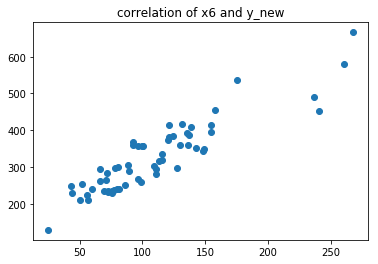

In [21]:
# 对实验期的y加上50单位的提升，并加入一个服从标准正太分布的白噪声
data['y_new'] = data.y + data.isExp * 50 + np.random.normal(0, 1, 60)

# 考察x6与因变量y_new之间的关系，用散点图描绘该关系
plt.scatter(data.x6, data.y_new)
plt.title('correlation of x6 and y_new')
plt.show()

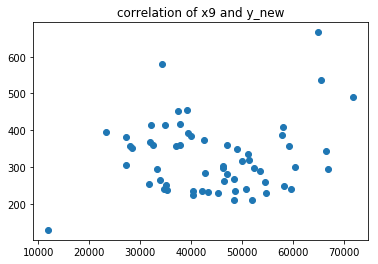

In [22]:
# 考察x9与因变量y_new之间的关系，用散点图描绘该关系
plt.scatter(data.x9, data.y_new)
plt.title('correlation of x9 and y_new')
plt.show()

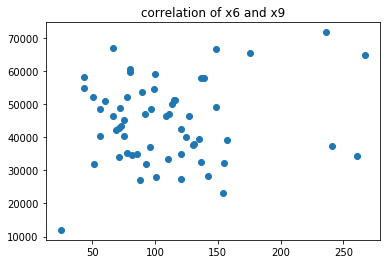

In [23]:
# 考察x6与x9之间的关系，用散点图描绘该关系
plt.scatter(data.x6, data.x9)
plt.title('correlation of x6 and x9')
plt.show()

In [24]:
# 考察实验组、对照组之中y_new的差异
diff = data.groupby('isExp').mean()[['y_new']].reset_index()
print(diff)

   isExp       y_new
0      0  287.529030
1      1  364.309601


In [25]:
# 数据预处理
model = ols('y_new ~ x6 + x9 + isExp', data=data)
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_new   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           1.53e-23
Time:                        14:44:47   Log-Likelihood:                -300.73
No. Observations:                  60   AIC:                             609.5
Df Residuals:                      56   BIC:                             617.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.3879     21.962      4.480      0.0

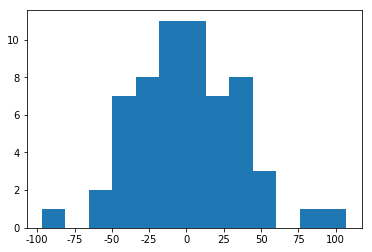

In [26]:
# 绘制回归方程残差的分布
plt.hist(est.resid, bins=13)
plt.show()